# Importing the Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import imblearn
print(imblearn.__version__) # check version number

0.10.1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the Dataset 

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/EDA_project/WA_Fn-UseC_-HR-Employee-Attrition[1].csv')
dataset.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


# Exploratory Data Analysis

Dataset Shape

In [4]:
dataset.shape

(1470, 35)

Dataset Info

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Checking for Duplicates

In [6]:
dataset.drop_duplicates(inplace=True)
dataset.shape

(1470, 35)

Dataset shape same as before implies no Duplicates

Numerical features

In [7]:
Num_features=list(dataset.select_dtypes(include=['float64','int64']).columns)
Num_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Some Categorical features have numerical datatypes, so we need to convert their datatypes to categorical.

In [8]:
Features_to_transe=list(('WorkLifeBalance', 'StockOptionLevel' ,'RelationshipSatisfaction' ,'PerformanceRating' ,'JobSatisfaction' ,'JobInvolvement','EnvironmentSatisfaction','Education','JobLevel'))
dataset[Features_to_transe] = dataset[Features_to_transe].astype('category')

In [9]:
# Create a dictionary for mapping the values in each column
education_map = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
environment_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_involvement_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
job_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
performance_rating_map = { 3: 'Excellent', 4: 'Outstanding'}
relationship_satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
work_life_balance_map = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
Job_Level_map={1: 'Entry', 2: 'Junior', 3: 'Mid-Level', 4: 'Senior', 5: 'Executive'}
stock_option_map = {0: 'No stock options granted', 
                    1: 'Stock options granted at a discount', 
                    2: 'Stock options granted at market price', 
                    3: 'Stock options granted at a premium price'}

# Use the map function to replace the values in each column
dataset['Education'] = dataset['Education'].map(education_map)
dataset['EnvironmentSatisfaction'] = dataset['EnvironmentSatisfaction'].map(environment_satisfaction_map)
dataset['JobInvolvement'] = dataset['JobInvolvement'].map(job_involvement_map)
dataset['JobSatisfaction'] = dataset['JobSatisfaction'].map(job_satisfaction_map)
dataset['PerformanceRating'] = dataset['PerformanceRating'].map(performance_rating_map)
dataset['RelationshipSatisfaction'] = dataset['RelationshipSatisfaction'].map(relationship_satisfaction_map)
dataset['WorkLifeBalance'] = dataset['WorkLifeBalance'].map(work_life_balance_map)
dataset['JobLevel'] = dataset['JobLevel'].map(Job_Level_map)
dataset['StockOptionLevel'] = dataset['StockOptionLevel'].map(stock_option_map)

Thus the Numerical features in the Dataset are:

In [10]:
Num_features=list(dataset.select_dtypes(include=['float64','int64']).columns)
Num_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'EmployeeCount',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Thus the categorical features in the Dataset are:

In [11]:
cat_features=list(dataset.select_dtypes(exclude=['float64','int64']).columns)
print(cat_features )
print(Features_to_transe)

['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
['WorkLifeBalance', 'StockOptionLevel', 'RelationshipSatisfaction', 'PerformanceRating', 'JobSatisfaction', 'JobInvolvement', 'EnvironmentSatisfaction', 'Education', 'JobLevel']


Each Categorical feature needs to have unique values 

In [12]:
for cat in cat_features:
    unique_vals = dataset[cat].unique()
    print(f"The unique values in '{cat}' variable are:")
    print(" ")
    for val in unique_vals:
        print(val)
    print("\n")

The unique values in 'Attrition' variable are:
 
Yes
No


The unique values in 'BusinessTravel' variable are:
 
Travel_Rarely
Travel_Frequently
Non-Travel


The unique values in 'Department' variable are:
 
Sales
Research & Development
Human Resources


The unique values in 'Education' variable are:
 
College
Below College
Master
Bachelor
Doctor


The unique values in 'EducationField' variable are:
 
Life Sciences
Other
Medical
Marketing
Technical Degree
Human Resources


The unique values in 'EnvironmentSatisfaction' variable are:
 
Medium
High
Very High
Low


The unique values in 'Gender' variable are:
 
Female
Male


The unique values in 'JobInvolvement' variable are:
 
High
Medium
Very High
Low


The unique values in 'JobLevel' variable are:
 
Junior
Entry
Mid-Level
Senior
Executive


The unique values in 'JobRole' variable are:
 
Sales Executive
Research Scientist
Laboratory Technician
Manufacturing Director
Healthcare Representative
Manager
Sales Representative
Research Director


# Visualization

Age Count Plot

In [13]:
# Create the plot 
fig = px.histogram(dataset, x='Age',
                   title='Age-Count Plot')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.update_traces(marker=dict(color='green'))

# Display the plot 
fig.show()

Proportions of Categorical Features

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [15]:
import plotly.graph_objects as go

# Assuming `dataset` is your DataFrame containing the data
# Count the values in the 'JobSatisfaction' column
satisfaction_counts = dataset['JobSatisfaction'].value_counts()
# Count the values in the 'MaritalStatus' column
marital_status_counts = dataset['MaritalStatus'].value_counts()
# Count the values in the 'JobLevel' column
job_level_counts = dataset['JobLevel'].value_counts()
PerformanceRating_counts=dataset['PerformanceRating'].value_counts()
# Count the values in the 'Gender' column
gender_counts = dataset['Gender'].value_counts()
RelationshipSatisfaction_counts=dataset['RelationshipSatisfaction'].value_counts()
WorkLifeBalance_counts=dataset['WorkLifeBalance'].value_counts()
OverTime_counts=dataset['OverTime'].value_counts()
JobRole_counts=dataset['JobRole'].value_counts()
Department_counts=dataset['Department'].value_counts()
EducationField_counts=dataset['EducationField'].value_counts()
BusinessTravel_counts=dataset['BusinessTravel'].value_counts()

# Create a list of chart types to be used for each subplot
                #0     #1     #2     #3     #4     #5      #6    #7      #8     #9     #10   #11
chart_types = ['Bar', 'Pie', 'Pie', 'Pie', 'Bar', 'Pie', 'Pie', 'Bar', 'Pie', 'Pie', 'Pie', 'Bar']

fig = make_subplots(rows=4, cols=3, subplot_titles=('<b>Proportion Of Gender<b>', '<b>Proportion Of Job Satisfaction<b>',
                                                    '<b>Proportion Of marital status<b>', '<b>Proportion Of job level<b>',
                                                    '<b>PerformanceRating<b>','<b>Relation ship Satisfaction<b>',
                                                   '<b>WorkLifeBalance<b>','<b>OverTime<b>',
                                                   '<b>JobRole<b>','<b>Department<b>',
                                                   '<b>EducationField<b>','<b> Business Travel <b>'),
                    specs=[[{'type': chart_types[0]}, {'type': chart_types[1]}, {'type': chart_types[2]}],
                           [{'type': chart_types[3]}, {'type': chart_types[4]}, {'type': chart_types[5]}],
                           [{'type': chart_types[6]}, {'type': chart_types[7]}, {'type': chart_types[8]}],
                           [{'type': chart_types[9]}, {'type': chart_types[10]}, {'type': chart_types[11]}]
                          ])

fig.add_trace(       #0
    go.Bar(
        x=gender_counts.index,
        y=gender_counts.values,
        text=dataset["Gender"]
        
    ), row=1, col=1
)
                                #1
fig.add_trace(
    go.Pie(
        labels=satisfaction_counts.index,
        values=satisfaction_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue', 'brown', 'purple'],
        pull=[0, 0.08, 0.03, 0.001]
        
    ), row=1, col=2
)
                                       #2
fig.add_trace(
    go.Pie(
        labels=marital_status_counts.index,
        values=marital_status_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=1, col=3
)
                                 #3
fig.add_trace( 
    go.Pie(
        labels=job_level_counts.index,
        values=job_level_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue', 'red', 'black'],
        pull=[0, 0.08, 0.03, 0.001]
        
    ), row=2, col=1
)


                                                #4
fig.add_trace(
    go.Bar(
         x=PerformanceRating_counts.index,
         y=PerformanceRating_counts.values,
         text=dataset['PerformanceRating']
    ), row=2, col=2
)
                                                #5
fig.add_trace(
    go.Pie(
        labels=RelationshipSatisfaction_counts.index,
        values=RelationshipSatisfaction_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue', 'red'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=2, col=3
)
                                                #6
fig.add_trace(
    go.Pie(
        labels=WorkLifeBalance_counts.index,
        values=WorkLifeBalance_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue', 'red'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=3, col=1
)
                                                #7
fig.add_trace(
    go.Bar(
        x=OverTime_counts.index,
        y=OverTime_counts.values,
        text=dataset['OverTime']
    ), row=3, col=2
)
                                                #8
fig.add_trace(
    go.Pie(
        labels=JobRole_counts.index,
        values=JobRole_counts.values,
        hole=0.1,
        marker_colors=['orange', 'green', 'blue', 'red','Lime','Coral','Violet','Yellow','JAM'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=3, col=3
)
                                                #9
fig.add_trace(
    go.Pie(
        labels=Department_counts.index,
        values=Department_counts.values,
        hole=0.1,
        marker_colors=['Lime','Violet','JAM'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=4, col=1
)
                                                    #10
fig.add_trace(
    go.Pie(
        labels=EducationField_counts.index,
        values=EducationField_counts.values,
        hole=0.1,
        marker_colors=['Lime','Violet','JAM','blue', 'red','green'],
        pull=[0, 0.08, 0.03, 0.001]
    ), row=4, col=2
)
                                                    #11
fig.add_trace(
    go.Bar(
        x=BusinessTravel_counts.index,
        y=BusinessTravel_counts.values,
        text=dataset['BusinessTravel']
        
    ), row=4, col=3
)
fig.update_layout(
    title='<b>Distributions<b>',
    showlegend=True,
    height=900,  # Adjust the height
    width=1250,   # Adjust the width
    margin=dict(l=10, r=10, t=50, b=10)  # Adjust the margin
)

fig.show()

Attrition & Gender

In [16]:
fig = px.histogram(dataset, x="Attrition", category_orders=dict(GeAttritionnder=["Male", "Female"]), color='Gender' ,title='Attrition and Gender')
fig.show()

Job Satisfaction by Age and Attrition

In [17]:
# Create the plot using plotly express
fig = px.strip(dataset, x='Age', y='JobSatisfaction', color='Attrition',
               title='` ')

# Add axis labels and customize the legend
fig.update_layout(xaxis_title='Age', yaxis_title='Job Satisfaction')
fig.update_traces(marker=dict(size=8))

# Display the plot
fig.show()

Job Satisfaction by Age and Job level

In [18]:
import plotly.express as px


# Create the plot using plotly express
fig = px.strip(dataset, x='Age', y='JobSatisfaction', color='JobLevel',
               title='Job Satisfaction by Age and Job Level')

# Add axis labels and customize the legend
fig.update_layout(xaxis_title='Age', yaxis_title='Job Satisfaction')
fig.update_traces(marker=dict(size=8))

# Display the plot 
fig.show()

Job Satisfaction by Attrition and Education field

In [19]:
import plotly.express as px

# Create the plot using plotly express
fig = px.strip(dataset, x='Attrition', y='JobSatisfaction', color='EducationField',
               title='Job Satisfaction by Attrition and Education Field')

# Add axis labels and customize the legend
fig.update_layout(xaxis_title='Attrition', yaxis_title='Job Satisfaction')
fig.update_traces(marker=dict(size=8))

# Display the plot
fig.show()

Job Satisfaction by Age and Job Role

In [20]:
import plotly.express as px

# Create the plot using plotly express
fig = px.strip(dataset, x='Age', y='JobSatisfaction', color='JobRole',
               title='Job Satisfaction by Age and Job Role')

# Add axis labels and customize the legend
fig.update_layout(xaxis_title='Age', yaxis_title='Job Satisfaction')
fig.update_traces(marker=dict(size=8))

# Display the plot
fig.show()

Job Satisfaction by Age and Business Travel

In [21]:
# Create the plot using plotly express
fig = px.scatter(dataset, x='Age', y='JobSatisfaction', color='BusinessTravel',
                 title='Job Satisfaction by Age and Business Travel', hover_data=['JobRole'])

# Add axis labels and customize the legend
fig.update_layout(xaxis_title='Age', yaxis_title='Job Satisfaction')
fig.update_traces(marker=dict(size=8))
fig.update_traces(marker=dict(size=10))

# Display the plot 
fig.show()

Performance Rating by Age and Gender

Text(0.5, 1.0, 'Performance Rating by Age and Gender')

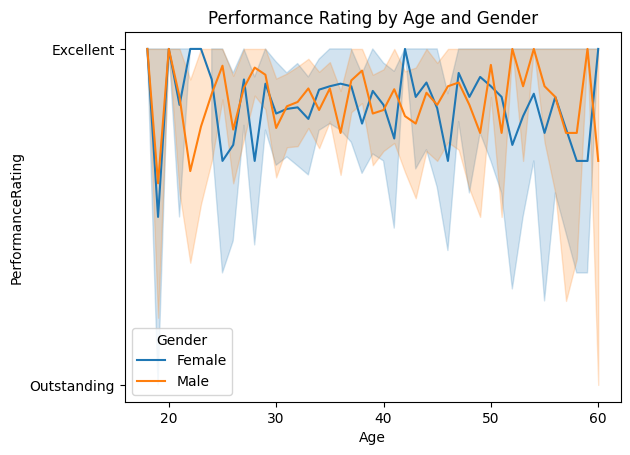

In [22]:
%matplotlib inline  

sns.lineplot(x='Age', y='PerformanceRating',hue='Gender'  ,data=dataset)
plt.title('Performance Rating by Age and Gender')

Job Level by Age and Marital Status

In [23]:
# Create the plot using plotly express
fig = px.scatter(dataset, x='Age', y='JobLevel', color='MaritalStatus',
                 title='Job Level by Age and Marital Status')

# Display the plot 
fig.show()

# Data preprocessing

Checking for missing values

In [24]:
dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Applying Statistics on the Dataset

In [25]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,65.891156,6502.931293,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,8379.000000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


Dataset Correlation Matrix

In [26]:
dataset.corr()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,NaN,-0.010145,0.024287,0.497855,0.028051,0.299635,0.003634,NaN,0.680381,-0.019621,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,NaN,-0.050990,0.023381,0.007707,-0.032182,0.038153,0.022704,NaN,0.014515,0.002453,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,NaN,0.032916,0.031131,-0.017014,0.027473,-0.029251,0.040235,NaN,0.004628,-0.036942,0.009508,0.018845,0.010029,0.014406
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,NaN,1.000000,0.035179,-0.014829,0.012648,-0.001251,-0.012944,NaN,-0.014365,0.023603,-0.011240,-0.008416,-0.009019,-0.009197
HourlyRate,0.024287,0.023381,0.031131,NaN,0.035179,1.000000,-0.015794,-0.015297,0.022157,-0.009062,NaN,-0.002334,-0.008548,-0.019582,-0.024106,-0.026716,-0.020123
MonthlyIncome,0.497855,0.007707,-0.017014,NaN,-0.014829,-0.015794,1.000000,0.034814,0.149515,-0.027269,NaN,0.772893,-0.021736,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.028051,-0.032182,0.027473,NaN,0.012648,-0.015297,0.034814,1.000000,0.017521,-0.006429,NaN,0.026442,0.001467,-0.023655,-0.012815,0.001567,-0.036746
NumCompaniesWorked,0.299635,0.038153,-0.029251,NaN,-0.001251,0.022157,0.149515,0.017521,1.000000,-0.010238,NaN,0.237639,-0.066054,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.022704,0.040235,NaN,-0.012944,-0.009062,-0.027269,-0.006429,-0.010238,1.000000,NaN,-0.020608,-0.005221,-0.035991,-0.001520,-0.022154,-0.011985


Since EmployeeCount and StandardHours variables have zero correlation with the other variables this implies they do not vary with respect to other values. So I can drop these two columns since they do not contain any useful information for the analysis.

In [27]:
dataset=dataset.drop(['StandardHours','EmployeeCount'] , axis=1)

In [28]:
Num_features.remove('EmployeeCount')
Num_features.remove('StandardHours')
#  remove the col Over 18 because it's have only one value
cat_features.remove('Over18')

The Distribution of Continuous variables using a Histogram

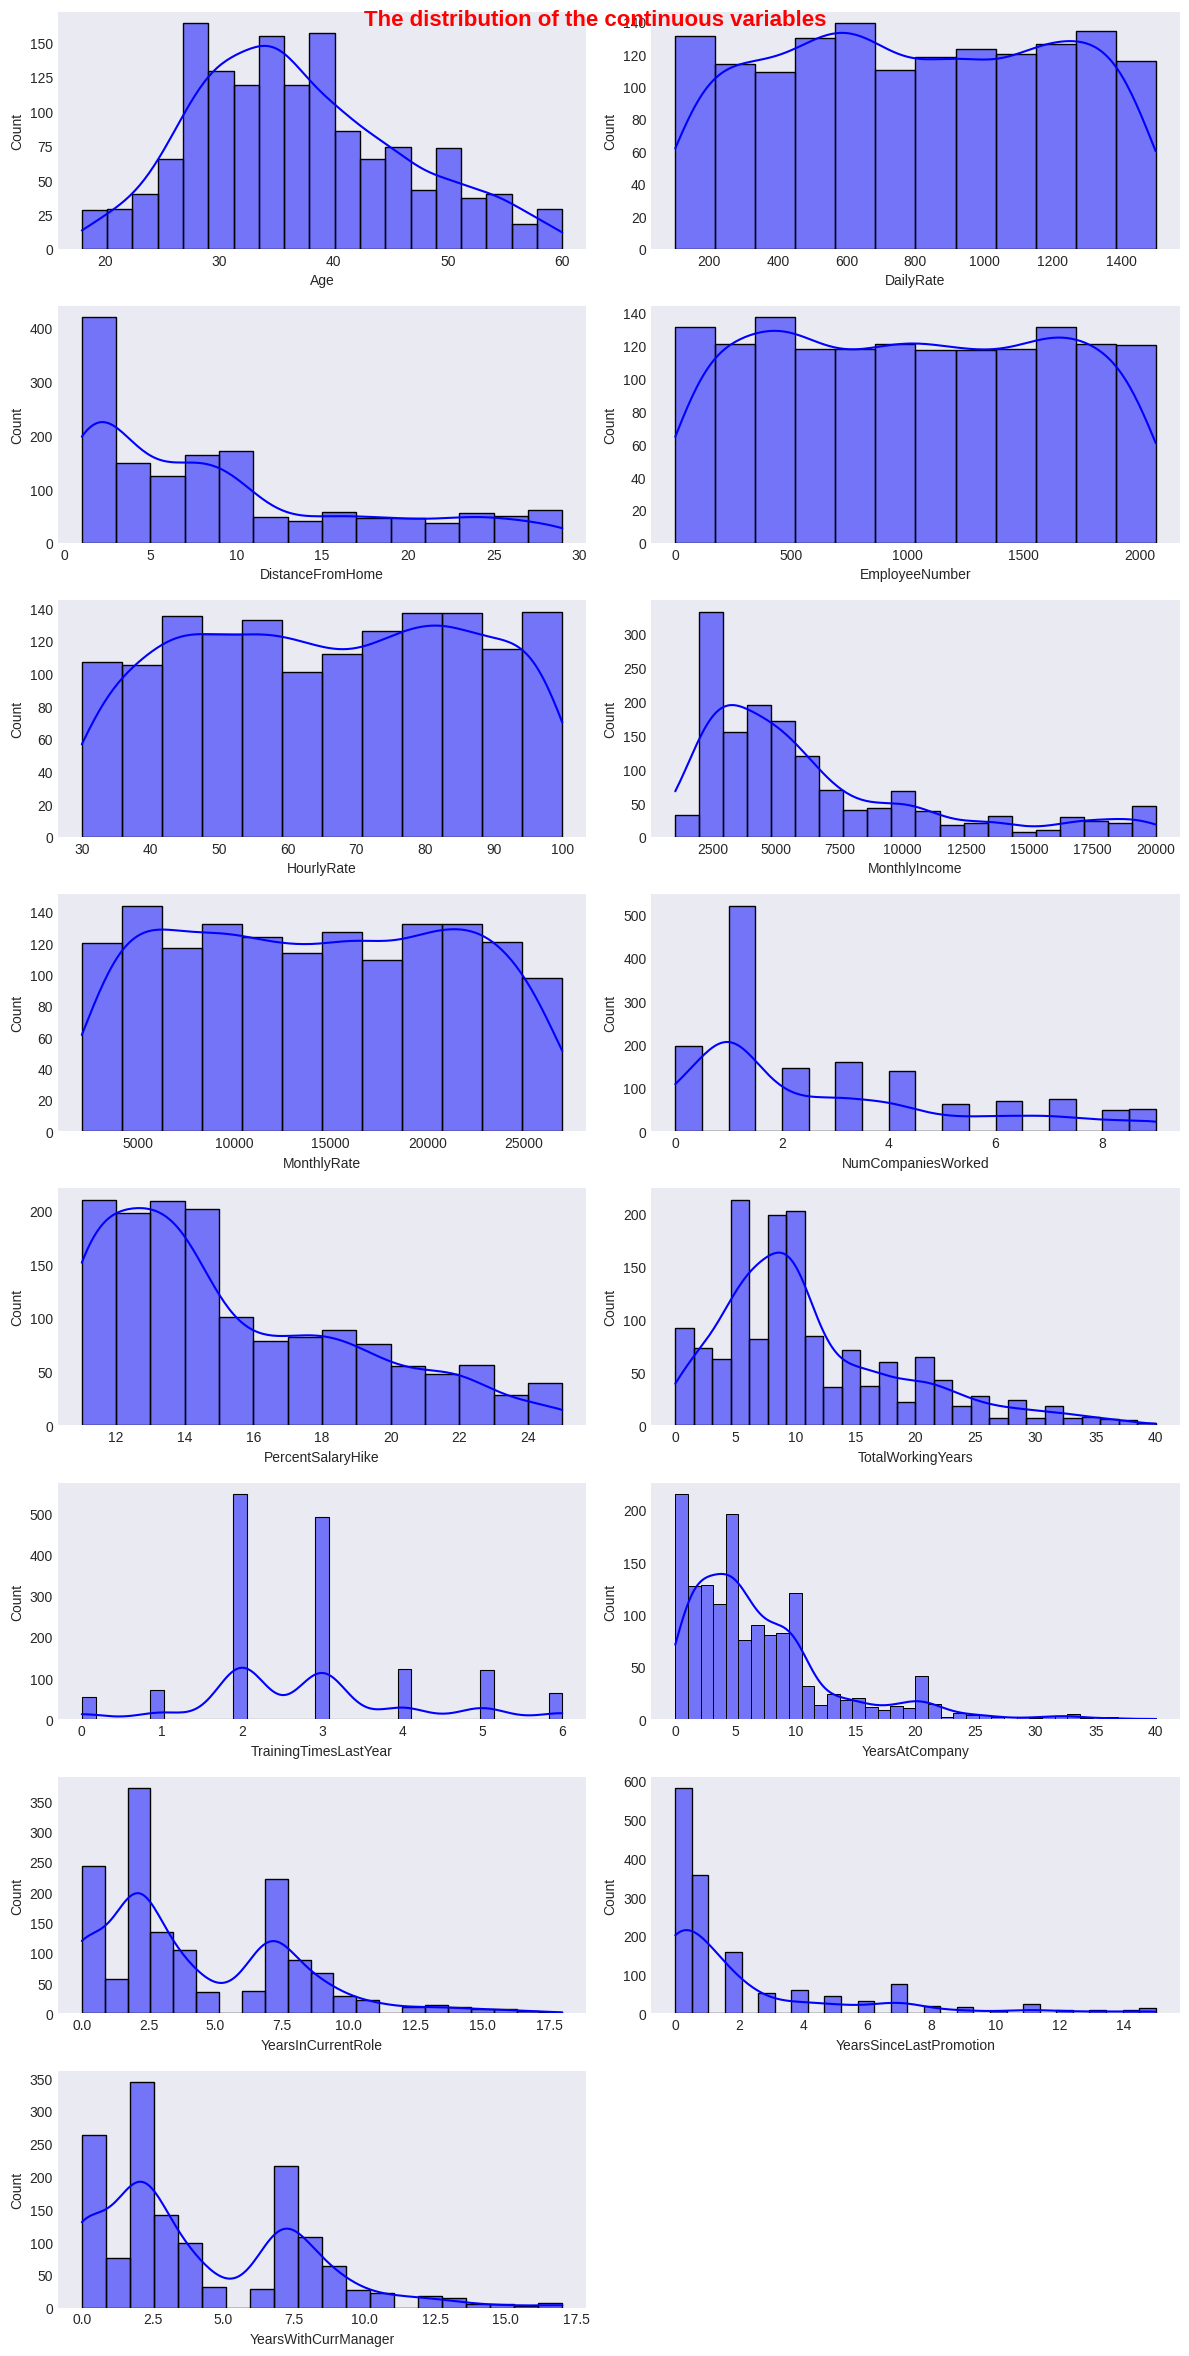

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-dark')
num_features = dataset.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(num_features)
num_rows = (num_cols + 1) // 2  # Calculate the number of rows needed

plt.figure(figsize=(12, 3*num_rows))
for i, col in enumerate(num_features):
    ax = plt.subplot(num_rows, 2, i+1)
    sns.histplot(data=dataset, x=col, ax=ax, color='blue', kde=True)

plt.suptitle('The distribution of the continuous variables', fontsize=16, fontweight='bold', color='Red')
plt.tight_layout()
plt.show()

Correlation HeatMap

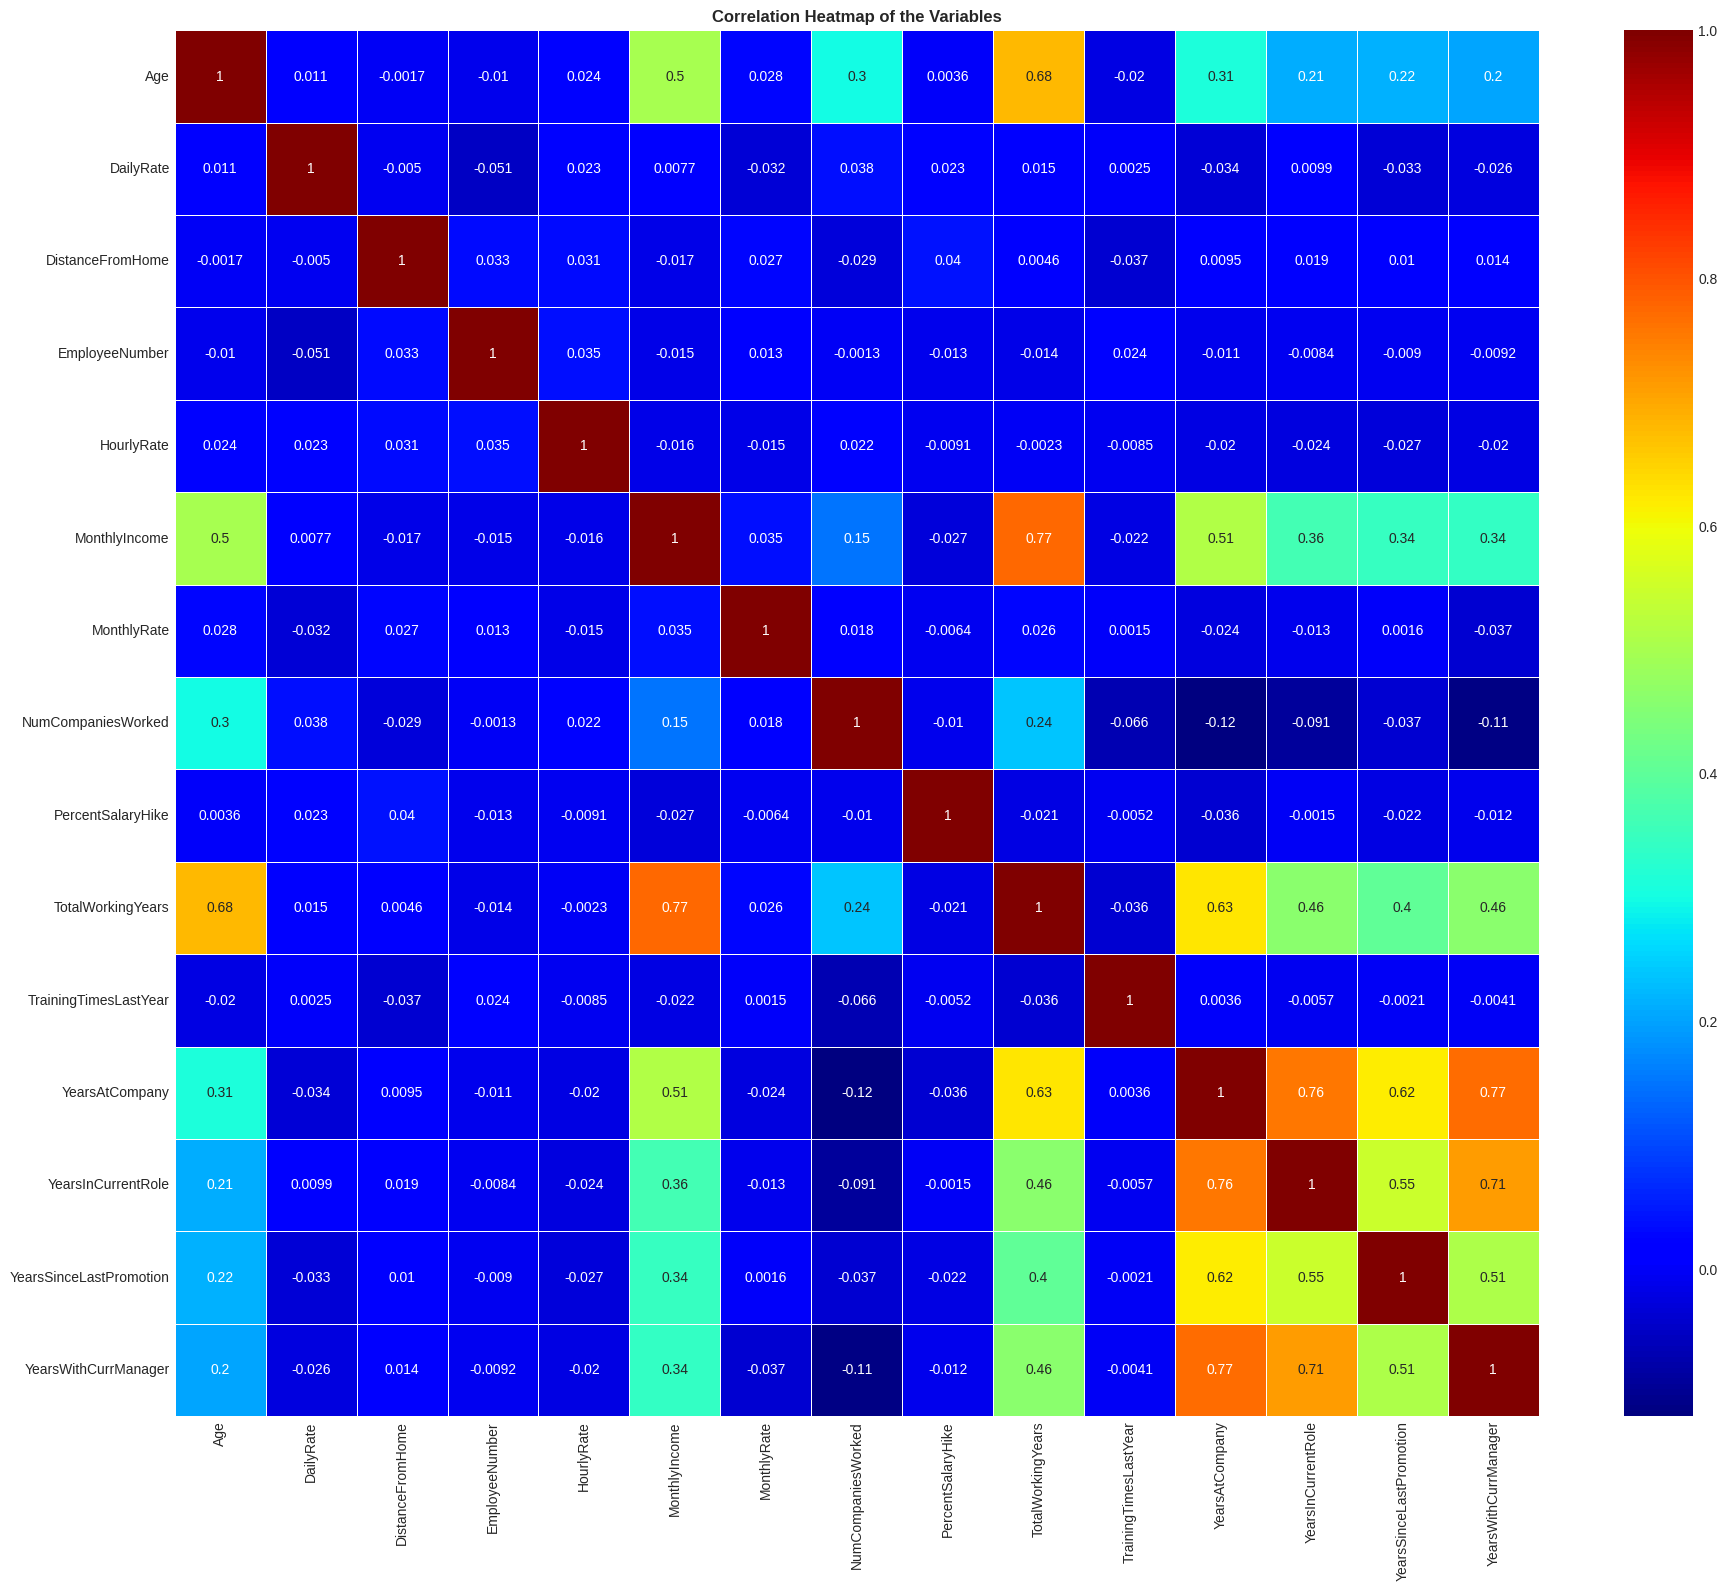

In [30]:
plt.figure(figsize=(22,18))
sns.heatmap(dataset.corr(),annot=True,  cmap='jet', linewidths=0.5, annot_kws={'size': 10})
plt.title('Correlation Heatmap of the Variables', fontsize=12, fontweight='bold')
plt.show()

Target Variable

In [31]:
y= dataset['Attrition']


# Feature Selection

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot


1. ANOVA F-test Feature Selection for ( Numerical Input, Categorical Output)

In [33]:
Num_selec_X=dataset[Num_features]

Num_selec_X.columns,y

(Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'),
 0       Yes
 1        No
 2       Yes
 3        No
 4        No
        ... 
 1465     No
 1466     No
 1467     No
 1468     No
 1469     No
 Name: Attrition, Length: 1470, dtype: object)

Applying ANOVA F-test

In [34]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [35]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Num_selec_X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Resultant Feature Importance DataFrame

In [36]:
# create the feature importance dataframe
feature_importance_df = pd.DataFrame({'Feature': Num_selec_X.columns, 'Score': fs.scores_})

# add a column for the index starting from 0
feature_importance_df['Number'] = range(len(feature_importance_df))

# set the index to the new column and drop the old index column
feature_importance_df.set_index('Number', inplace=True)

# print the resulting dataframe
print(feature_importance_df)

                        Feature      Score
Number                                    
0                           Age  20.395175
1                     DailyRate   3.384441
2              DistanceFromHome   8.553061
3                EmployeeNumber   0.541336
4                    HourlyRate   0.018822
5                 MonthlyIncome  21.070741
6                   MonthlyRate   0.155347
7            NumCompaniesWorked   0.488807
8             PercentSalaryHike   0.264651
9             TotalWorkingYears  24.058873
10        TrainingTimesLastYear   4.395220
11               YearsAtCompany  15.462023
12           YearsInCurrentRole  23.604649
13      YearsSinceLastPromotion   0.216724
14         YearsWithCurrManager  23.782316


Resultant Feature Importance Graph

In [37]:
import plotly.graph_objs as go

# create trace
trace = go.Bar(x=Num_selec_X.columns, y=fs.scores_)

# create layout
layout = go.Layout(title='Feature Importance Scores of the numerical features', xaxis=dict(tickangle=-45))

# create figure
fig = go.Figure(data=[trace], layout=layout)

# update figure size
fig.update_layout(width=800, height=500)

# show figure
fig.show()


Chi-Squared test (Categorical Input, Categorical Output)

FeatureEngineering

In [38]:
encoded_X=dataset[cat_features].drop('Attrition', axis=1)
encoded_X

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,Junior,Sales Executive,Very High,Single,Yes,Excellent,Low,No stock options granted,Bad
1,Travel_Frequently,Research & Development,Below College,Life Sciences,High,Male,Medium,Junior,Research Scientist,Medium,Married,No,Outstanding,Very High,Stock options granted at a discount,Better
2,Travel_Rarely,Research & Development,College,Other,Very High,Male,Medium,Entry,Laboratory Technician,High,Single,Yes,Excellent,Medium,No stock options granted,Better
3,Travel_Frequently,Research & Development,Master,Life Sciences,Very High,Female,High,Entry,Research Scientist,High,Married,Yes,Excellent,High,No stock options granted,Better
4,Travel_Rarely,Research & Development,Below College,Medical,Low,Male,High,Entry,Laboratory Technician,Medium,Married,No,Excellent,Very High,Stock options granted at a discount,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,College,Medical,High,Male,Very High,Junior,Laboratory Technician,Very High,Married,No,Excellent,High,Stock options granted at a discount,Better
1466,Travel_Rarely,Research & Development,Below College,Medical,Very High,Male,Medium,Mid-Level,Healthcare Representative,Low,Married,No,Excellent,Low,Stock options granted at a discount,Better
1467,Travel_Rarely,Research & Development,Bachelor,Life Sciences,Medium,Male,Very High,Junior,Manufacturing Director,Medium,Married,Yes,Outstanding,Medium,Stock options granted at a discount,Better
1468,Travel_Frequently,Sales,Bachelor,Medical,Very High,Male,Medium,Junior,Sales Executive,Medium,Married,No,Excellent,Very High,No stock options granted,Good


Original Encoder

In [39]:
from sklearn.preprocessing import OrdinalEncoder

# create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# define the columns to encode
cols_to_encode = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
                  'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel']

# fit the encoder to the data
encoder.fit(encoded_X[cols_to_encode])

# transform the specified columns
encoded_X[cols_to_encode] = encoder.transform(encoded_X[cols_to_encode])
encoded_X

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,Travel_Rarely,Sales,2.0,Life Sciences,2.0,Female,0.0,2.0,Sales Executive,3.0,Single,Yes,0.0,1.0,No stock options granted,0.0
1,Travel_Frequently,Research & Development,1.0,Life Sciences,0.0,Male,2.0,2.0,Research Scientist,2.0,Married,No,1.0,3.0,Stock options granted at a discount,2.0
2,Travel_Rarely,Research & Development,2.0,Other,3.0,Male,2.0,0.0,Laboratory Technician,0.0,Single,Yes,0.0,2.0,No stock options granted,2.0
3,Travel_Frequently,Research & Development,4.0,Life Sciences,3.0,Female,0.0,0.0,Research Scientist,0.0,Married,Yes,0.0,0.0,No stock options granted,2.0
4,Travel_Rarely,Research & Development,1.0,Medical,1.0,Male,0.0,0.0,Laboratory Technician,2.0,Married,No,0.0,3.0,Stock options granted at a discount,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,2.0,Medical,0.0,Male,3.0,2.0,Laboratory Technician,3.0,Married,No,0.0,0.0,Stock options granted at a discount,2.0
1466,Travel_Rarely,Research & Development,1.0,Medical,3.0,Male,2.0,3.0,Healthcare Representative,1.0,Married,No,0.0,1.0,Stock options granted at a discount,2.0
1467,Travel_Rarely,Research & Development,0.0,Life Sciences,2.0,Male,3.0,2.0,Manufacturing Director,2.0,Married,Yes,1.0,2.0,Stock options granted at a discount,2.0
1468,Travel_Frequently,Sales,0.0,Medical,3.0,Male,2.0,2.0,Sales Executive,2.0,Married,No,0.0,3.0,No stock options granted,3.0


One Hot Encoding

In [40]:
import pandas as pd

# define the columns to one-hot encode
cols_to_encode = ['StockOptionLevel', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# perform one-hot encoding
encoded_cols = pd.get_dummies(encoded_X[cols_to_encode])

# concatenate the encoded columns with the original dataset
encoded_X = pd.concat([encoded_X, encoded_cols], axis=1)

# drop the original columns that have been encoded
encoded_X.drop(cols_to_encode, axis=1, inplace=True)
encoded_X

,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,StockOptionLevel_No stock options granted,StockOptionLevel_Stock options granted at a discount,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,2.0,2.0,0.0,2.0,3.0,0.0,1.0,0.0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,1.0,0.0,2.0,2.0,2.0,1.0,3.0,2.0,0,1,...,0,0,1,0,0,0,1,0,1,0
2,2.0,3.0,2.0,0.0,0.0,0.0,2.0,2.0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,4.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,...,0,0,1,0,0,0,1,0,0,1
4,1.0,1.0,0.0,0.0,2.0,0.0,3.0,2.0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2.0,0.0,3.0,2.0,3.0,0.0,0.0,2.0,0,1,...,0,0,0,0,0,0,1,0,1,0
1466,1.0,3.0,2.0,3.0,1.0,0.0,1.0,2.0,0,1,...,0,0,0,0,0,0,1,0,1,0
1467,0.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,0,1,...,1,0,0,0,0,0,1,0,0,1
1468,0.0,3.0,2.0,2.0,2.0,0.0,3.0,3.0,1,0,...,0,0,0,1,0,0,1,0,1,0


Chi-Square Test

In [41]:
from sklearn.feature_selection import chi2
from matplotlib import pyplot

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(encoded_X, y)
# i'll make a copy of encoded_X to use this copy for ploting 
encoded_X_copy=encoded_X.copy()
encoded_X = fs.transform(encoded_X)

Resultant Feature Importance DataFrame

In [42]:
# create the feature importance dataframe
feature_importance_df = pd.DataFrame({'Feature': encoded_X_copy.columns, 'Score': fs.scores_})

# add a column for the index starting from 0
feature_importance_df['Number'] = range(len(feature_importance_df))

# set the index to the new column and drop the old index column
feature_importance_df.set_index('Number', inplace=True)

# print the resulting dataframe
print(feature_importance_df)

                                                  Feature      Score
Number                                                              
0                                               Education   3.108840
1                                 EnvironmentSatisfaction   0.867333
2                                          JobInvolvement   0.149139
3                                                JobLevel  58.268745
4                                         JobSatisfaction   6.692900
5                                       PerformanceRating   0.010381
6                                RelationshipSatisfaction   0.500955
7                                         WorkLifeBalance   1.433406
8               StockOptionLevel_No stock options granted  32.015095
9       StockOptionLevel_Stock options granted at a di...  19.940896
10      StockOptionLevel_Stock options granted at mark...   8.496206
11      StockOptionLevel_Stock options granted at a pr...   0.146103
12                              Bu

Resultant Feature Importance Graph

In [43]:
import plotly.graph_objs as go

# create trace
trace = go.Bar(x=list(encoded_X_copy.columns), y=fs.scores_)

# create layout
layout = go.Layout(title='Feature Importance Scores of the categorical features', xaxis=dict(tickangle=-45))

# create figure
fig = go.Figure(data=[trace], layout=layout)

# update figure size
fig.update_layout(width=1200, height=900)

# show figure
fig.show()

Concat the encoded Features with the numerical features

In [44]:
X = pd.concat([encoded_X_copy, Num_selec_X], axis=1)

Check for Multicollinearity

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Education,2.121888
1,EnvironmentSatisfaction,2.483734
2,JobInvolvement,1.615441
3,JobLevel,4.285322
4,JobSatisfaction,2.524888
5,PerformanceRating,2.430418
6,RelationshipSatisfaction,2.532279
7,WorkLifeBalance,7.854845
8,Age,29.738213
9,DailyRate,4.877876


Remove features based on Feature selection

In [46]:
X=X.drop(['PercentSalaryHike','YearsAtCompany','TotalWorkingYears','HourlyRate','WorkLifeBalance'],axis=1)


Check for Multicollinearity again

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Education,2.111468
1,EnvironmentSatisfaction,2.447595
2,JobInvolvement,1.580808
3,JobLevel,4.208174
4,JobSatisfaction,2.445467
5,PerformanceRating,1.184823
6,RelationshipSatisfaction,2.462355
7,Age,17.783675
8,DailyRate,4.487122
9,DistanceFromHome,2.254864


In [48]:
print(pd.Series(y).value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


# Check for Over Sampling

Show the Target classes before applying Synthetic Minority OverSampling Technique (SMOTE)

In [49]:
import plotly.express as ex

fig = ex.pie(y,names='Attrition')
fig.update_layout(title='<b>Attrition Proportion before SMOTE Upsampling<b>')
fig.show()

Show the Target classes after appling SMOTE

In [50]:
# transform the dataset
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

print(pd.Series(y).value_counts())

Yes    1233
No     1233
Name: Attrition, dtype: int64


In [51]:
import plotly.express as ex

fig = ex.pie(y,names='Attrition')
fig.update_layout(title='<b>Attrition Proportion After SMOTE Upsampling<b>')
fig.show()

Label Encoder

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y= le.fit_transform(y)

y

array([1, 0, 1, ..., 1, 1, 1])

Training & Test Dataset 

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Power Transformation and Feature Scaling

In [54]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

# Power transformation
power_transformer = PowerTransformer(method='yeo-johnson')
X_train = power_transformer.fit_transform(X_train)
X_test = power_transformer.transform(X_test)

# Standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

Create DataFrame to store the accuracies

In [55]:
accuracies_dict={}
accuracies_dataframe=pd.DataFrame(accuracies_dict)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report ,roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#KNN model

In [57]:
# Define a range of k values
k_values = np.arange(1, 21)

# Initialize lists to store accuracies for different k values
accuracies = []

# Iterate over different k valuesة
for k in k_values:
    # Create a KNN classifier with the current k value
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Create a trace for the accuracy values
trace = go.Scatter(
    x=k_values,
    y=accuracies,
    mode='lines+markers',
    name='Accuracy',
    line=dict(color='blue'),
    marker=dict(symbol='circle', size=8)
)

# Create the layout for the plot
layout = go.Layout(
    title='Accuracy for Different Number of Neighbors (k)',
    xaxis=dict(title='Number of Neighbors (k)'),
    yaxis=dict(title='Accuracy'),
    hovermode='closest',
    showlegend=False
)

# Create the figure and add the trace
fig = go.Figure(data=[trace], layout=layout)

# Show the interactive plot
fig.show()

Model Training

In [58]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 1)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

KNN Model Confusion Matrix

In [59]:
KNN_y_pred = KNN_classifier.predict(X_test)

# Compute the confusion matrix
KNN_cm = confusion_matrix(y_test, KNN_y_pred)
print("Confusion Matrix:")
print(KNN_cm)

# Compute the accuracy score
KNN_accuracy = accuracy_score(y_test, KNN_y_pred)
print("Accuracy: {:.2f}%".format(KNN_accuracy * 100))

# Compute the classification report
KNN_report = classification_report(y_test, KNN_y_pred)
print("Classification Report:")
print(KNN_report)

Confusion Matrix:
[[352  24]
 [ 18 346]]
Accuracy: 94.32%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       376
           1       0.94      0.95      0.94       364

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740



k-Fold Cross Validation of KNN Model

In [60]:
KNN_CROSS_VAL = cross_val_score(estimator=KNN_classifier, X=X_train, y=y_train, cv=10, scoring='accuracy', n_jobs=-1)
print("(Accuracy): {:.2f}%".format(KNN_CROSS_VAL.mean() * 100))
accuracies_dataframe['KNeighborsClassifier']={'accuracy':KNN_CROSS_VAL.mean()*100}

(Accuracy): 94.09%


# Kernel SVM Classifier

Kernel SVM Model Training

In [61]:
Kernel_SVM_classifier = SVC(kernel = 'rbf', random_state = 42)
Kernel_SVM_classifier.fit(X_train, y_train)

SVC(random_state=42)

Kernel SVM Model Confusion Matrix

In [62]:
Kernel_SVM_y_pred = Kernel_SVM_classifier.predict(X_test)

# Compute the confusion matrix
Kernel_SVM_cm = confusion_matrix(y_test, Kernel_SVM_y_pred)
print("Confusion Matrix:")
print(Kernel_SVM_cm)

# Compute the accuracy score
Kernel_SVM_accuracy = accuracy_score(y_test, Kernel_SVM_y_pred)
print("Accuracy: {:.2f}%".format(Kernel_SVM_accuracy * 100))

# Compute the classification report
Kernel_SVM_report = classification_report(y_test, Kernel_SVM_y_pred)
print("Classification Report:")
print(Kernel_SVM_report)

Confusion Matrix:
[[371   5]
 [ 50 314]]
Accuracy: 92.57%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       376
           1       0.98      0.86      0.92       364

    accuracy                           0.93       740
   macro avg       0.93      0.92      0.93       740
weighted avg       0.93      0.93      0.93       740



k-Fold Cross Validation of Kernel SVM Model

In [63]:
# Perform cross-validation and compute F1-score
KernelSVM_CROSS_VAL =cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, scoring='accuracy', n_jobs=-1)
print("(Accuracy): {:.2f}%".format(KernelSVM_CROSS_VAL.mean() * 100))

accuracies_dataframe['Kernel SVM']={'accuracy':KernelSVM_CROSS_VAL.mean()*100}

(Accuracy): 91.31%


# Logistic Regression Model

Logistics Regression Model training

In [64]:
LG_classifier = LogisticRegression(random_state = 42)
LG_classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

Logistic Regression Model Confusion Matrix

In [65]:
# Define a dictionary to store accuracies
accuracies_dict = {}

LG_y_pred = LG_classifier.predict(X_test)

# Compute the confusion matrix
LG_cm = confusion_matrix(y_test, LG_y_pred)
print("Confusion Matrix:")
print(LG_cm)

# Compute the accuracy score
LG_accuracy = accuracy_score(y_test, LG_y_pred)
print("Accuracy: {:.2f}%".format(LG_accuracy * 100))

# Compute the classification report
LG_report = classification_report(y_test, LG_y_pred)
print("Classification Report:")
print(LG_report)

Confusion Matrix:
[[365  11]
 [ 44 320]]
Accuracy: 92.57%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       376
           1       0.97      0.88      0.92       364

    accuracy                           0.93       740
   macro avg       0.93      0.92      0.93       740
weighted avg       0.93      0.93      0.93       740



k-Fold Cross Validation of Logistic Regression Model

In [66]:
# Perform cross-validation and compute F1-score
LR_CROSS_VAL =cross_val_score(estimator=LG_classifier, X=X_train, y=y_train, cv=10, scoring='accuracy', n_jobs=-1)
print("(Accuracy): {:.2f}%".format(LR_CROSS_VAL.mean() * 100))
accuracies_dataframe['LogisticRegression'] = {'accuracy':LR_CROSS_VAL.mean()*100}

(Accuracy): 91.60%


#Linear SVM Model

Linear SVM Model Training

In [67]:
linear_SVM_classifier = SVC(kernel = 'linear', random_state = 40)
linear_SVM_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=40)

Linear SVM Model Confusion Matrix

In [68]:
linear_SVM_y_pred = linear_SVM_classifier.predict(X_test)

# Compute the confusion matrix
linear_SVM_cm = confusion_matrix(y_test, linear_SVM_y_pred)
print("Confusion Matrix:")
print(linear_SVM_cm)

# Compute the accuracy score
linear_SVM_accuracy = accuracy_score(y_test, linear_SVM_y_pred)
print("Accuracy: {:.2f}%".format(linear_SVM_accuracy * 100))

# Compute the classification report
linear_SVM_report = classification_report(y_test, linear_SVM_y_pred)
print("Classification Report:")
print(linear_SVM_report)


Confusion Matrix:
[[373   3]
 [ 50 314]]
Accuracy: 92.84%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       376
           1       0.99      0.86      0.92       364

    accuracy                           0.93       740
   macro avg       0.94      0.93      0.93       740
weighted avg       0.94      0.93      0.93       740



k-Fold Cross Validation of Linear SVM Model

In [69]:
LinearSVM_CROSS_VAL = cross_val_score(estimator=linear_SVM_classifier, X=X_train, y=y_train, scoring='accuracy', cv=10, n_jobs=-1)

print("Accuracy: {:.2f}%".format(LinearSVM_CROSS_VAL.mean() * 100))
print("Standard Deviation: {:.2f}%".format(LinearSVM_CROSS_VAL.std() * 100))
accuracies_dataframe['linear SVM']={'accuracy':LinearSVM_CROSS_VAL.mean()*100}


Accuracy: 91.77%
Standard Deviation: 1.58%


# Model Selection

Accuracies

In [70]:
print(accuracies_dataframe.T)

                       accuracy
KNeighborsClassifier  94.087915
Kernel SVM            91.308980
LogisticRegression    91.597661
linear SVM            91.771744


Subplot of Cross validation scores of the ML models used 

In [71]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,subplot_titles=('KNeighborsClassifier Cross Val Scores',
                                                                     'Kernel SVM',
                                                                     'Logistic Regression Cross Val Scores',
                                                                    'linear SVM Cross Val Scores'))           

fig.add_trace(
    go.Scatter(x=list(range(0,len(KNN_CROSS_VAL))),y=KNN_CROSS_VAL,name='KNeighborsClassifier Cross Val Scores'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(KNN_CROSS_VAL))),y=KernelSVM_CROSS_VAL,name='Kernel SVM'),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=list(range(0,len(KNN_CROSS_VAL))),y=LR_CROSS_VAL,name='Logistic Regression Cross Val Scores'),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=list(range(0,len(KNN_CROSS_VAL))),y=LinearSVM_CROSS_VAL,name='linear SVM Cross Val Scores'),
    row=4, col=1
)


fig.update_layout(height=1000, width=1500, title_text="10 Fold Cross Validation of the ML Models")
fig.update_yaxes(title_text="accuracy Score")
fig.update_xaxes(title_text="Fold #")

fig.show()

Visual Comparision of Classifier Models' Results and true values

In [72]:
# Generate random classification results for demonstration

# Create the scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=np.arange(len(y_test)),
    y=y_test,
    mode='markers',
    marker=dict(color='#FF0000',size=24),
    name='Actual'
))

fig.add_trace(go.Scatter(
    x=np.arange(len(KNN_y_pred)),
    y=KNN_y_pred,
    mode='markers',
    marker=dict(color='mediumturquoise',size=20, symbol='x'),
    name='KNN Predicted'
))


fig.add_trace(go.Scatter(
    x=np.arange(len(Kernel_SVM_y_pred)),
    y=Kernel_SVM_y_pred,
    mode='markers',
    marker=dict(color='green',size=20, symbol='triangle-up'),
    name='Kernel SVM Predicted'
))

fig.add_trace(go.Scatter(
    x=np.arange(len(LG_y_pred)),
    y=LG_y_pred,
    mode='markers',
    marker=dict(color='cyan',size=20, symbol='star'),
    name='Logistic Regression  Predicted'
))


fig.add_trace(go.Scatter(
    x=np.arange(len(linear_SVM_y_pred)),
    y=linear_SVM_y_pred,
    mode='markers',
    marker=dict(color='floralwhite',size=20, symbol='cross'),
    name='linear Support Vector Machine Predicted'
))


fig.update_layout(
    xaxis=dict(title='Data point index', tickfont=dict(size=22)),
    yaxis=dict(title='Class label', tickfont=dict(size=22)),
    title=dict(text='Classification Models: Predicted vs Actual Labels', font=dict(size=26)),
    showlegend=True,
    width=2000,  # Set the width of the plot
    height=600,  # Set the height of the plot
    plot_bgcolor='lightgray'  # Set the background color of the plot
)
fig.show()
